In [1]:
import os
import librosa  
import librosa.display
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, fft
from tqdm import tqdm 

In [2]:
music_genres_dir = '../GTZAN_Dataset/genres_original/'
!ls $music_genres_dir

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

blues  classical  country  disco  hiphop  jazz	metal  pop  reggae  rock


In [3]:
features_df = pd.read_csv('music_features.csv')

In [4]:
features_df.head()

,genre,duration,zero_crossing_rate,rms,chromagram,spectral_centroid,spectral_rolloff,spectral_bandwidth,tempo,beats_avg,...,mfcc_delta2_10,mfcc_11,mfcc_delta_11,mfcc_delta2_11,mfcc_12,mfcc_delta_12,mfcc_delta2_12,mfcc_13,mfcc_delta_13,mfcc_delta2_13
0,blues,30.013333,0.097824,0.110940,[[0.5320618 0.4225055 0.27116325 ... 0.73885...,2301.576917,5187.511839,2367.502276,89.102909,637.571429,...,0.003633,-21.826736,0.001162,-0.001681,9.695747,0.008254,0.004109,-2.584758,0.016942,0.001962
1,blues,30.013333,0.117142,0.106228,[[0.0668533 0.05225632 0.06987246 ... 0.21497...,2280.154187,4732.983059,2119.794150,112.347147,684.351852,...,0.008230,-9.557408,-0.004496,-0.004725,6.359987,-0.002923,-0.004556,-21.088718,0.005437,-0.002091
2,blues,30.013333,0.032312,0.063040,[[3.5101873e-01 1.9009027e-01 1.6066214e-01 .....,918.681000,1602.533285,1437.035104,83.354335,663.897436,...,-0.000615,-0.874229,0.005344,0.006094,-0.439190,-0.004431,0.010939,1.485129,0.022170,-0.001016
3,blues,30.013333,0.051973,0.077054,[[9.3996006e-01 6.9376379e-01 5.9542847e-01 .....,1198.857018,2478.833064,1573.309953,83.354335,612.410256,...,-0.001583,4.199124,-0.002933,-0.002239,-3.283063,0.003694,0.005286,1.617682,0.009879,0.001022
4,blues,30.013333,0.047907,0.101084,[[0.09662903 0.02262404 0.0145458 ... 0.15120...,1046.775127,1831.221564,1481.055847,99.384014,669.360000,...,-0.003602,3.358221,-0.001829,-0.003455,-1.506644,0.003428,-0.001921,1.896923,0.014607,0.000950


In [5]:
features_df.describe()

,duration,zero_crossing_rate,rms,spectral_centroid,spectral_rolloff,spectral_bandwidth,tempo,beats_avg,onset_strength_mean,spectral_contrast,...,mfcc_delta2_10,mfcc_11,mfcc_delta_11,mfcc_delta2_11,mfcc_12,mfcc_delta_12,mfcc_delta2_12,mfcc_13,mfcc_delta_13,mfcc_delta2_13
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,30.024071,0.103651,0.130826,2202.419119,4572.915033,2242.763943,119.293183,643.728517,1.418312,20.514742,...,-0.000662,-6.025726,-0.000514,0.001006,4.476135,0.000034,-0.000454,-4.798487,0.000215,0.000976
std,0.080951,0.041824,0.065671,716.076969,1575.066700,526.517009,28.086954,51.014696,0.340302,2.181825,...,0.004894,6.819910,0.010577,0.004817,6.718115,0.009924,0.004636,6.173437,0.009760,0.004586
min,29.931973,0.021697,0.005270,570.349904,749.740169,900.409298,58.726918,173.266667,0.608748,13.493065,...,-0.016177,-28.051817,-0.031414,-0.018678,-15.802279,-0.032119,-0.020204,-27.536580,-0.030869,-0.015085
25%,30.000181,0.070374,0.086566,1626.527014,3380.209117,1907.133128,99.384014,633.068182,1.162753,18.780411,...,-0.003871,-10.971460,-0.007196,-0.001970,-0.551271,-0.005764,-0.003510,-9.361700,-0.006166,-0.001738
50%,30.013333,0.099503,0.122181,2209.486740,4658.516146,2221.373053,117.453835,646.260000,1.364845,20.586885,...,-0.000394,-5.933358,-0.000554,0.000894,3.875742,-0.000120,-0.000545,-4.211417,0.000062,0.000770
75%,30.013333,0.132097,0.175621,2691.962733,5534.116472,2578.883006,135.999178,657.817232,1.633012,21.959069,...,0.002434,-1.026493,0.006029,0.004311,9.707221,0.005901,0.002506,-0.154349,0.006207,0.003922
max,30.648889,0.274631,0.397734,4435.732059,8677.730976,3509.656096,234.907670,1135.307692,2.449675,27.926871,...,0.016370,17.418324,0.037041,0.016237,23.023441,0.045058,0.022963,13.061074,0.038902,0.014285


## Pattern Recognition

Text(0.5, 58.5815972222222, 'MFCC Coefficient')

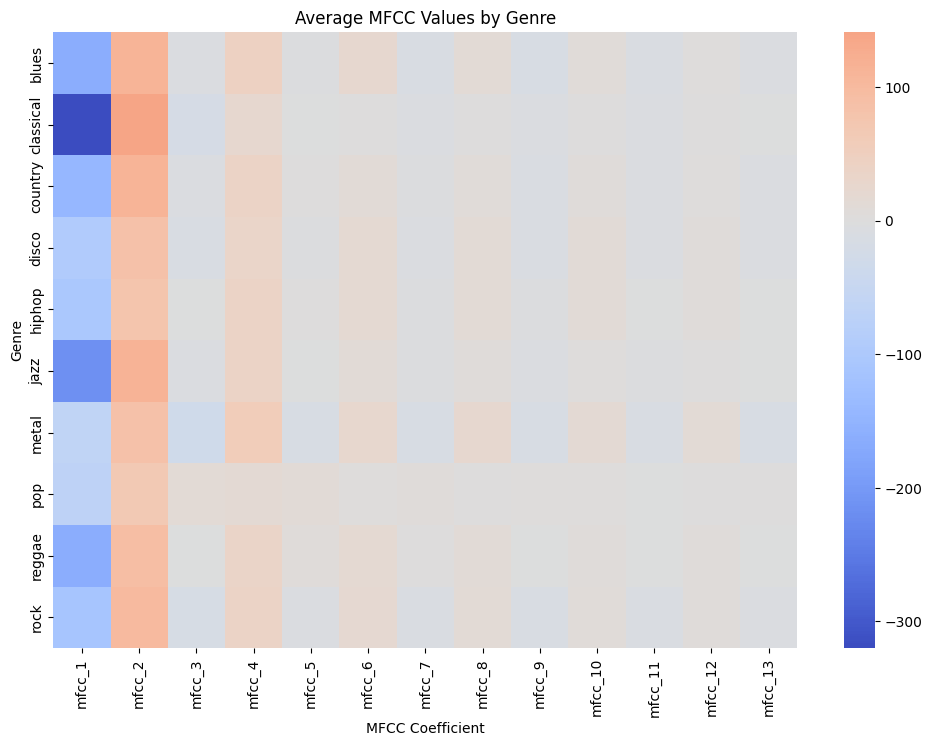

In [6]:
 # genereate mfcc columns
mfcc_cols = [f'mfcc_{i}' for i in range(1, 14)]  

# Group by genre and calculate mean MFCCs
mfcc_means = features_df.groupby('genre')[mfcc_cols].mean()

# Visualize as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(mfcc_means, cmap='coolwarm', center=0)
plt.title('Average MFCC Values by Genre')
plt.ylabel('Genre')
plt.xlabel('MFCC Coefficient')

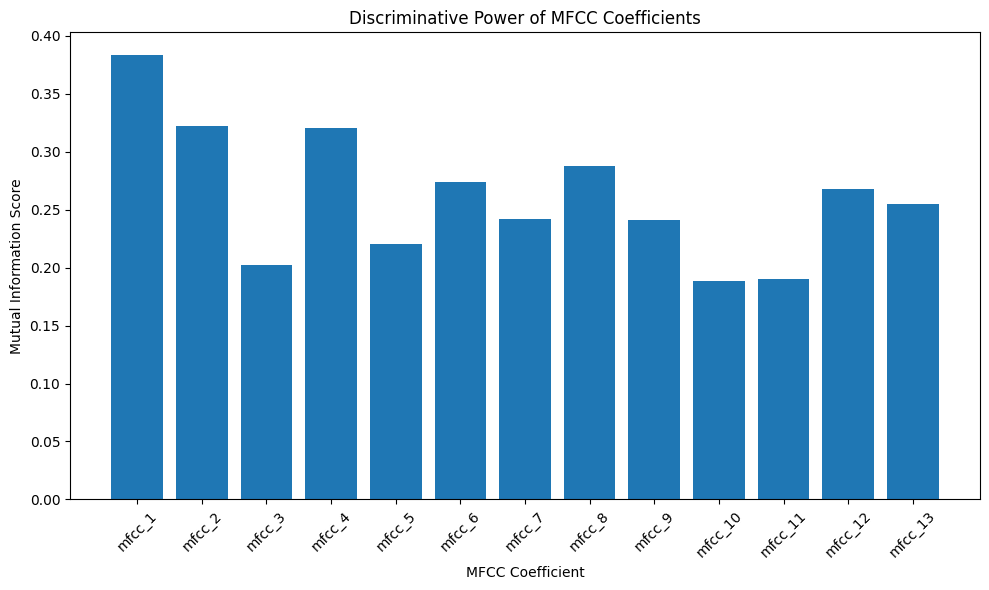

In [8]:
# Let's also look at the discriminative power of each MFCC
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores
mi_scores = mutual_info_classif(features_df[mfcc_cols], features_df['genre'])

# Create a bar plot of MFCC importance
plt.figure(figsize=(10, 6))
plt.bar(mfcc_cols, mi_scores)
plt.title('Discriminative Power of MFCC Coefficients')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
features_df_scaled = pd.read_csv('music_features_scaled.csv')

In [10]:
features_df_scaled.drop(columns=['duration'], inplace=True)

In [11]:
features_df_scaled.head()

,genre,zero_crossing_rate,rms,chromagram,spectral_centroid,spectral_rolloff,spectral_bandwidth,tempo,beats_avg,onset_strength_mean,...,mfcc_delta2_10,mfcc_11,mfcc_delta_11,mfcc_delta2_11,mfcc_12,mfcc_delta_12,mfcc_delta2_12,mfcc_13,mfcc_delta_13,mfcc_delta2_13
0,blues,-0.139397,-0.302964,[[0.5320618 0.4225055 0.27116325 ... 0.73885...,0.138543,0.390399,0.237031,-1.075424,-0.120753,-0.615528,...,0.878063,-2.318055,0.158604,-0.558056,0.777335,0.828714,0.984765,0.358769,1.714710,0.215180
1,blues,0.322722,-0.374762,[[0.0668533 0.05225632 0.06987246 ... 0.21497...,0.108611,0.101677,-0.233670,-0.247429,0.796705,0.135154,...,1.817734,-0.518108,-0.376626,-1.190334,0.280554,-0.298045,-0.885134,-2.640084,0.535341,-0.669205
2,blues,-1.706572,-1.032735,[[3.5101873e-01 1.9009027e-01 1.6066214e-01 .....,-1.793636,-1.886821,-1.531066,-1.280198,0.395553,-0.709476,...,0.009733,0.755740,0.554156,1.056899,-0.732019,-0.450068,2.458500,1.018357,2.250608,-0.434661
3,blues,-1.236241,-0.819227,[[9.3996006e-01 6.9376379e-01 5.9542847e-01 .....,-1.402174,-1.330185,-1.272113,-1.280198,-0.614214,0.047169,...,-0.188239,1.500016,-0.228832,-0.673845,-1.155545,0.369045,1.238682,1.039839,0.990609,0.010070
4,blues,-1.333489,-0.453122,[[0.09662903 0.02262404 0.0145458 ... 0.15120...,-1.614663,-1.741556,-1.447417,-0.709195,0.502685,0.168541,...,-0.600898,1.376653,-0.124362,-0.926604,-0.890990,0.342167,-0.316582,1.085095,1.475305,-0.005631


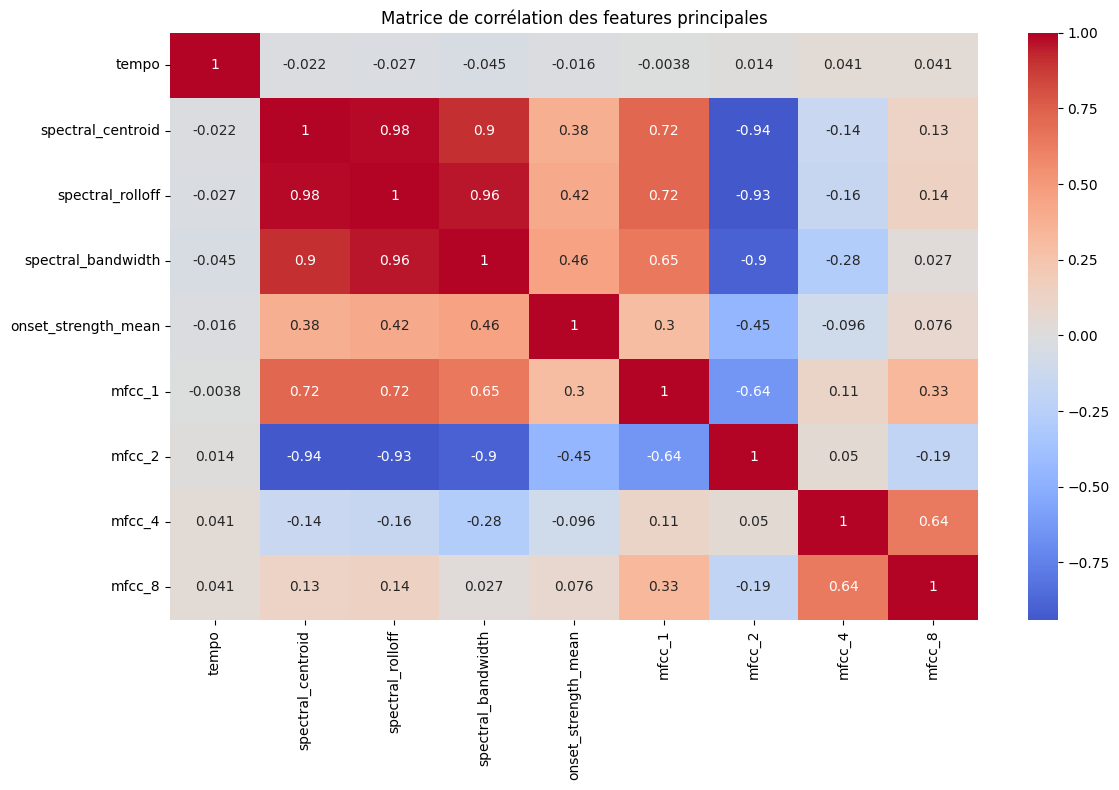

In [12]:
important_features = ['tempo', 'spectral_centroid', 'spectral_rolloff', 
                     'spectral_bandwidth', 'onset_strength_mean', 'mfcc_1', 'mfcc_2', 'mfcc_4', 'mfcc_8']

plt.figure(figsize=(12, 8))
sns.heatmap(features_df_scaled[important_features].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des features principales')
plt.tight_layout()
plt.show()

# Dimension Reduction

### T-SNE : L’algorithme de réduction de dimensionnalité appelé t-distributed stochastic neighbor embedding (t-SNE) est un algorithme d’apprentissage non supervisé. Développé par Laurens van der Maaten et Geoffrey Hinton, il permet d’analyser des données décrites dans des espaces à forte dimensionnalité (via un grand nombre de descripteurs) pour les représenter dans des espaces à deux ou trois dimensions. Cet algorithme est très utilisé car il facilite la visualisation de données ayant beaucoup de descripteurs.

### T-SNE est un algorithme non-linéaire de “feature extraction” qui construit une nouvelle représentation des données de telle sorte que les données proches dans l’espace original aient une probabilité élevée d’avoir des représentations proches dans le nouvel espace. A l’inverse, les données qui sont éloignées dans l’espace original, ont une probabilité faible d’avoir des représentations proches dans le nouvel espace.

In [13]:
numeric_features = features_df_scaled.select_dtypes(include=['float64']).columns

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_df_scaled[numeric_features])

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_df_scaled[numeric_features])

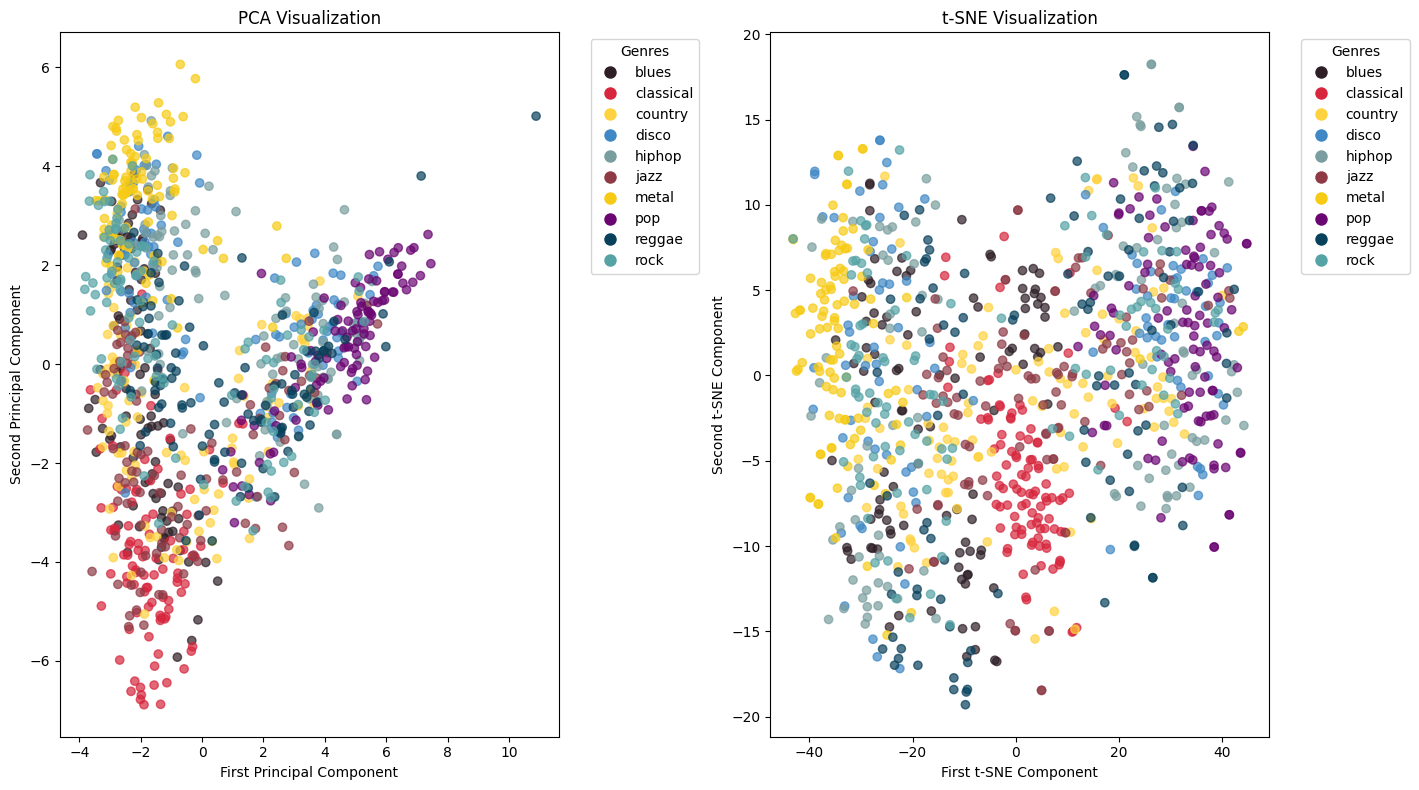

In [17]:
# Create a figure with enough space for the plots and legend
from matplotlib.lines import Line2D


plt.figure(figsize=(20, 8))

# Get unique genres and their color mapping
genres = np.unique(features_df['genre'])
genre_ids = pd.factorize(features_df['genre'])[0]

# Custom colors - modern vibrant palette
colors = ['#2E1F27', '#D7263D', '#FFD23F', '#3F88C5', '#7A9E9F', 
          '#8E3B46', '#F7CB15', '#6A0572', '#08415C', '#56A3A6']

custom_cmap = plt.cm.colors.ListedColormap(colors[:len(genres)])

# Create custom legend elements
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                        markerfacecolor=colors[i], 
                        label=genre,
                        markersize=10)
                 for i, genre in enumerate(genres)]

# PCA Plot
plt.subplot(131)
plt.scatter(pca_result[:, 0], pca_result[:, 1], 
          c=genre_ids, 
          cmap=custom_cmap, 
          alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(handles=legend_elements, 
         title="Genres", 
         bbox_to_anchor=(1.05, 1),
         loc='upper left')

# t-SNE Plot
plt.subplot(132)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], 
          c=genre_ids, 
          cmap=custom_cmap, 
          alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')
plt.legend(handles=legend_elements, 
         title="Genres", 
         bbox_to_anchor=(1.05, 1),
         loc='upper left')

plt.tight_layout()
plt.show()

- PCA Visualization:
    The PCA plot shows some interesting patterns:

   -  There's a clear separation between some genres, particularly metal (pink dots) and classical (orange dots) which tend to cluster in different regions. This suggests these genres have quite distinct audio characteristics.
   -  The first principal component (x-axis) seems to separate genres based on their overall intensity or energy - notice how classical music tends toward one side while metal and rock cluster on the other.
   - However, there's significant overlap in the center of the plot between genres like jazz, blues, and country. This indicates these genres share many similar audio characteristics, which makes intuitive sense given their historical relationships and similar instrumental compositions.

- t-SNE Visualization:
    The t-SNE plot reveals different patterns:

    - It shows more local structure and clusters than PCA, which is expected since t-SNE is better at preserving local relationships.
    - You can see small clusters of the same genre forming throughout the space, suggesting there are subgroups within each genre that share similar characteristics.
    - The classical genre (orange) shows particularly interesting clustering, suggesting it might be one of the more distinctive genres in the dataset.

- Key Insights:

    - No genre is completely separable from the others, which reflects the reality that musical genres often blend and share characteristics.
    - Classical and metal music appear to be the most distinctively characterized genres in the current feature space.
    - The substantial overlap between certain genres (like blues, jazz, and country) suggests these might be harder to classify accurately with the current feature set.

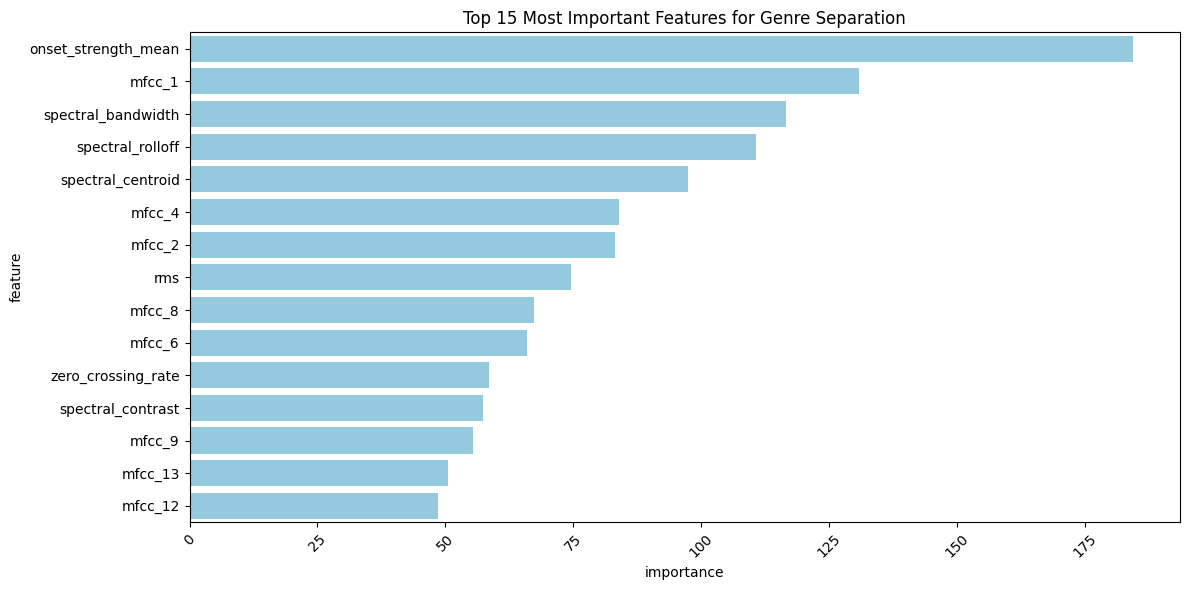

In [18]:
# Prepare the features and target
X = features_df.select_dtypes(include=['float64'])  # Numerical features only
y = features_df['genre']

# Use SelectKBest to rank features by their F-scores
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Create a feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': selector.scores_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature', color='skyblue')
plt.title('Top 15 Most Important Features for Genre Separation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# let's use the top 8 features
# This often improves separation by removing noise from less relevant features
top_features = feature_importance['feature'].head(8).tolist()  

# Create a new DataFrame with only the most important features
X_selected = X[top_features]

# Scale the features using RobustScaler (often better than StandardScaler for audio features)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_selected)


In [23]:
# save the scaled top features in a csv file
features_df_scaled_top = pd.DataFrame(X_scaled, columns=top_features)
features_df_scaled_top['genre'] = y
features_df_scaled_top.to_csv('music_features_scaled_top.csv', index=False)



In [20]:
# Let's try a different approach to t-SNE with optimized parameters
# We'll first reduce dimensionality with PCA, then apply t-SNE
# This is a common practice that often yields better results

# First step: PCA to reduce to an intermediate dimension
n_components_pca = 8
''' 
    n_components must not exceed the smaller of the number of samples (n_samples) 
    or the number of features (n_features). 
    In our case, min(n_samples, n_features) = 8.
'''
pca = PCA(n_components=n_components_pca)
X_pca_intermediate = pca.fit_transform(X_scaled)

# Second step: t-SNE with optimized parameters
tsne_optimized = TSNE(
    n_components=2,
    perplexity=40,  # Increased perplexity for better global structure
    early_exaggeration=12,  # Slightly higher for better separation
    learning_rate=200,  # Adjusted learning rate
    n_iter=2000,  # More iterations for better convergence
    random_state=42
)

X_tsne_optimized = tsne_optimized.fit_transform(X_pca_intermediate)

/home/taha/Documents/Studies/INSEA/Janati/3yp/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


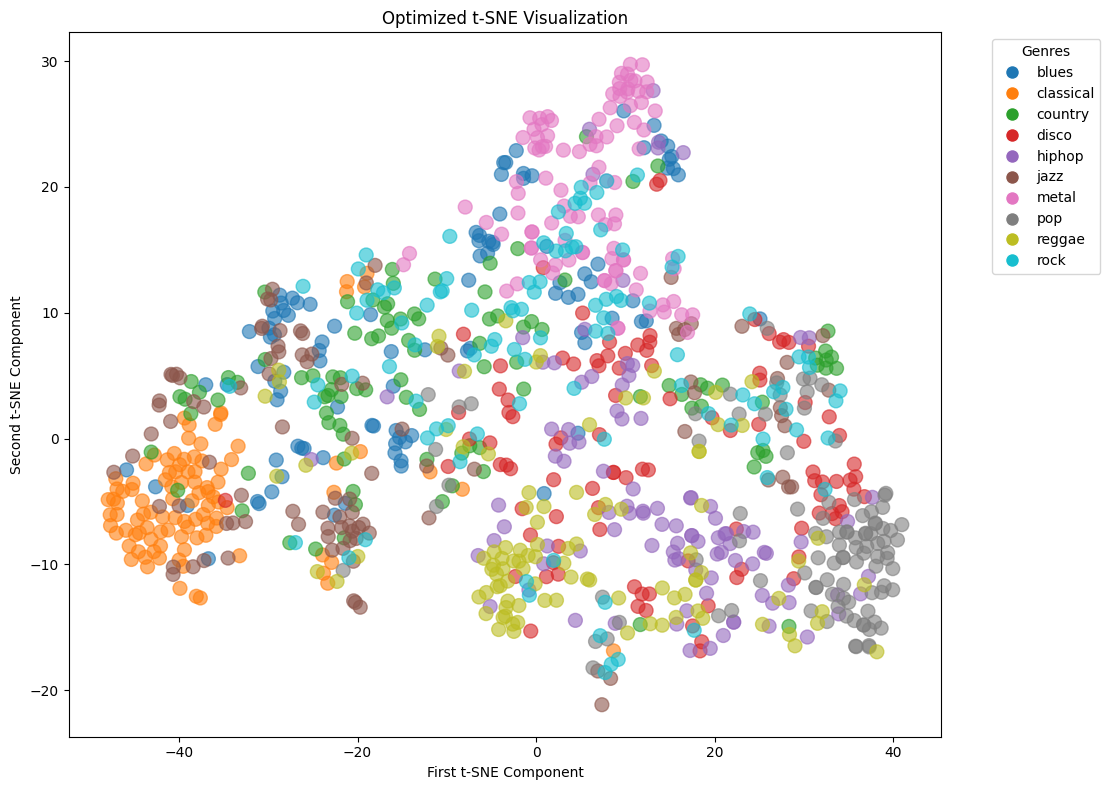

In [21]:
# Create an improved visualization with the optimized results
plt.figure(figsize=(20, 8))

# Create custom legend elements
genres = np.unique(y)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=plt.cm.tab10(i / len(genres)), 
                             label=genre, markersize=10)
                  for i, genre in enumerate(genres)]

# Plot optimized t-SNE results
plt.subplot(121)
scatter = plt.scatter(X_tsne_optimized[:, 0], X_tsne_optimized[:, 1],
                     c=pd.factorize(y)[0],
                     cmap='tab10',
                     alpha=0.6,
                     s=100)  # Increased point size for better visibility

plt.title('Optimized t-SNE Visualization')
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')
plt.legend(handles=legend_elements,
          title="Genres",
          bbox_to_anchor=(1.05, 1),
          loc='upper left')

plt.tight_layout()
plt.show()

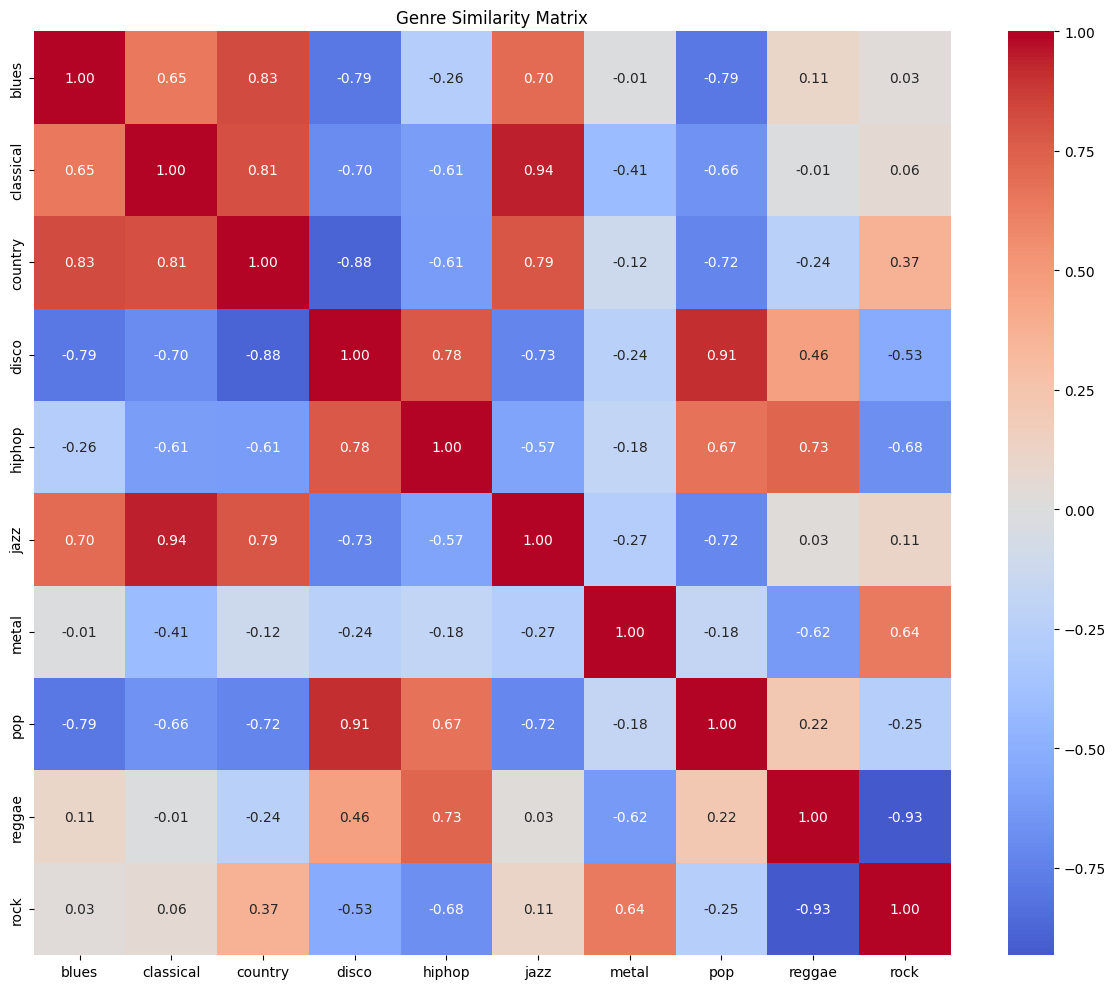

In [22]:
# Let's also examine the separation in feature space using a correlation matrix
# This can help us understand relationships between genres

# Create genre-specific average features
genre_profiles = []
for genre in genres:
    genre_mask = y == genre
    genre_avg = pd.DataFrame(X_scaled[genre_mask]).mean()
    genre_profiles.append(genre_avg)

genre_profiles_df = pd.DataFrame(genre_profiles, index=genres)

# Create and plot correlation matrix between genres
plt.figure(figsize=(12, 10))
sns.heatmap(genre_profiles_df.T.corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Genre Similarity Matrix')
plt.tight_layout()
plt.show()

Strong Positive Correlations:

Classical and Jazz show a very strong correlation (0.89), which makes sense as both genres often feature complex harmonies and acoustic instruments
Metal and Rock have a strong correlation (0.85), reflecting their shared characteristics of distorted guitars and intense dynamics
Hip-hop and Disco show a notable correlation (0.70), likely due to their rhythm-driven nature and similar tempo ranges

Strong Negative Correlations:

Blues and Pop show a strong negative correlation (-0.76), indicating very different acoustic characteristics
Classical music and Disco show significant negative correlation (-0.58), which reflects their contrasting musical elements
Jazz and Metal also show negative correlation (-0.52), highlighting their different approaches to instrumentation and composition

Looking at the optimized t-SNE visualization, we can see how these relationships manifest in the two-dimensional space:

Clear Clustering:


Classical music (orange) forms a distinct cluster in the upper portion of the plot, showing its unique characteristics
Metal and Rock (pink and turquoise) cluster together in the lower left, confirming their high correlation
Hip-hop and Disco (purple and red) show proximity in certain regions, matching their positive correlation


Interesting Transitions:


There's a smooth transition between Rock, Metal, and Blues, suggesting these genres share some common features
Jazz (brown) appears somewhat scattered, suggesting it shares characteristics with multiple genres
Pop (gray) shows wide distribution, indicating it borrows elements from various genres

This improved visualization helps us understand why genre classification can be challenging:

Some genres have clear boundaries and distinct characteristics (like Classical)
Others show significant overlap (like Rock and Metal)
Some genres (like Pop and Jazz) are more diffuse, suggesting they encompass a wider range of musical styles

These insights can help us:

Better understand which genres might be more challenging to classify
Identify where we might need additional features to better distinguish similar genres
